In [3]:
import pandas as pd
import scipy.stats as sp
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


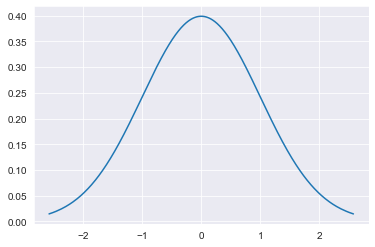

In [4]:
# plotting a normal distribution
x_qtiles = np.linspace(0.005,0.995,1000)
# getting the x-plots
x_plot = sp.norm.ppf(x_qtiles)
y_plot = sp.norm.pdf(x_plot)
sns.set_style('darkgrid')
ax_ = sns.lineplot(x=x_plot,y=y_plot)


### Problem 3

In [31]:
# code to run Rao-Blacwellization
def Rao_Blackwell(x_pdf,y_pdf,x_y_pdf,n=1000,*args,**kwargs):
    # function to run R-B
    # x_pdf is the unconditional true density of X
    # y_pdf is the candidate density function
    # x_y_pdf is the conditional density of x given y. 
    # all pdfs need to be functions

    # first we simulate X directly
    x_val = x_pdf(n);
    x_bar = np.mean(x_val)
    x_bar_std = np.std(x_val)/np.sqrt(n)

    # next we simulate Y directly
    y_val = y_pdf(n);
    # we now get x_cond values
    x_cond = x_y_pdf(y_val,*args,**kwargs)
    # we then estimate the mean and variance
    x_bar_cond =np.mean(x_cond)
    x_bar_cond_std = np.std(y_val)/np.sqrt(n)
    results = {'f': pd.Series({'mean':x_bar,'mstd':x_bar_std}),'rb':pd.Series({'mean':x_bar_cond,'mstd':x_bar_cond_std})}
    return pd.DataFrame(results)

In [34]:
# part (a)
x_pdf_a = lambda n: sp.nbinom.rvs(5,0.5,size=n)
y_pdf_a = lambda n: sp.gamma.rvs(a=5,scale=1,size=n)
def x_y_pdf_a(y):
    results = np.zeros(len(y))
    for iy,y_ in enumerate(y):
        results[iy]=sp.poisson.rvs(mu=y_,size=1)
    return results

prob_3a = Rao_Blackwell(x_pdf_a,y_pdf_a,x_y_pdf_a,n=1000)
print(prob_3a)
print(prob_3a.to_latex()) 

f        rb
mean  5.176000  4.871000
mstd  0.103784  0.069985
\begin{tabular}{lrr}
\toprule
{} &         f &        rb \\
\midrule
mean &  5.176000 &  4.871000 \\
mstd &  0.103784 &  0.069985 \\
\bottomrule
\end{tabular}



In [69]:
# part (b)
x_pdf_b = lambda n: sp.t.rvs(loc=0,df=2,size=n)
y_pdf_b = lambda n: sp.gamma.rvs(a=1,scale=1,size=n)
def x_y_pdf_b(y):
    results = np.zeros(len(y))
    for iy,y_ in enumerate(y):
        results[iy]=sp.norm.rvs(loc=0,scale=pow(y_,0.5))
    return results
prob_3b = Rao_Blackwell(x_pdf_b,y_pdf_b,x_y_pdf_b,n=1000)
print(prob_3b)
print(prob_3b.to_latex())

f        rb
mean -0.009345  0.006874
mstd  0.093833  0.031913
\begin{tabular}{lrr}
\toprule
{} &         f &        rb \\
\midrule
mean & -0.009345 &  0.006874 \\
mstd &  0.093833 &  0.031913 \\
\bottomrule
\end{tabular}



In [82]:
# part (c)
# for n in binomial we will set to 100
nbin = 100
x_pdf_c = lambda n: sp.betabinom.rvs(a=1,b=5,n=nbin,size=n)
y_pdf_c = lambda n: sp.beta.rvs(a=1,b=5,size=n)
def x_y_pdf_c(y):
    results = np.zeros(len(y))
    for iy,y_ in enumerate(y):
        results[iy]=sp.binom.rvs(n=nbin,p=y_,size=1)
    return results

prob_3c = Rao_Blackwell(x_pdf_c,y_pdf_c,x_y_pdf_c,n=1000)
print(prob_3c)
print(prob_3c.to_latex())

f         rb
mean  16.881000  17.484000
mstd   0.464851   0.004767
\begin{tabular}{lrr}
\toprule
{} &          f &         rb \\
\midrule
mean &  16.881000 &  17.484000 \\
mstd &   0.464851 &   0.004767 \\
\bottomrule
\end{tabular}



In [77]:
sp.beta.rvs(a=1,b=5,size=1)

array([0.0573999])

In [79]:
sp.binom.rvs(n=100,p=sp.beta.rvs(a=1,b=5,size=1),size=1)

array([21])